In [1]:
import os
import csv
import json
import ast
import shutil
import random
from collections import Counter
import matplotlib.pyplot as plt

Recursive Search for a Key

In [ ]:
def find_key_value(data, target_key, categories=None):
    
    if categories is None:
        categories = []

    if isinstance(data, dict):
        for key, value in data.items():
            if key == target_key:
                categories.append(value)
            find_key_value(value, target_key, categories)

    elif isinstance(data, list):
        for item in data:
            find_key_value(item, target_key, categories)

    return categories

Save labels as dictionary

In [ ]:
# annotation paths
path1 = "/vol/ideadata/ep56inew/image_subsets/labels/vidvrd-dataset/test"
path2 = "/vol/ideadata/ep56inew/image_subsets/labels/vidvrd-dataset/train"

all_videos_list = []

def create_label_list(annotations_path):
    for item in os.listdir(annotations_path):
        item_path = os.path.join(annotations_path, item)
        
        # process one json file
        if os.path.isfile(item_path):
            with open(item_path, 'r') as json_file:

                # initialize list
                my_list = []

                # write json file into a dictionary
                data = json.load(json_file)

                # extract video name
                video_id = data["video_id"] 
                print(video_id)

                # extract label
                labels = find_key_value(data, "category")
                labels_amount = len(labels)
                
                # write values into list (to save in csv later)
                my_list.extend([video_id, labels_amount, labels])
        
                all_videos_list.append(my_list)

create_label_list(path1)
create_label_list(path2)
len(all_videos_list)

Write list with video names and labels to csv file

In [ ]:
# initialize csv file
with open("/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/labels.csv", "a", newline='') as final_file:
    writer = csv.writer(final_file)

    # Write each list as a row in the CSV file
    for lst in all_videos_list:
        writer.writerow(lst)

print("Data has been written to output.csv")

Find videos that only have one class

In [ ]:

# Function to check if all elements in a list are the same
def all_elements_same(lst):
    return len(set(lst)) == 1

# Read the CSV file and filter rows
input_file = '/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/labels.csv'
output_file = '/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/one_class_labels.csv'

filtered_rows = []

with open(input_file, mode='r', newline='') as infile:
    reader = csv.reader(infile)
    headers = next(reader)  # Assuming the first row is the header
    filtered_rows.append(headers)  # Keep the header in the filtered rows
    
    for row in reader:
        # Parse the third column as a list
        list_in_third_column = ast.literal_eval(row[2])
        
        if all_elements_same(list_in_third_column):
            filtered_rows.append(row)

# Write the filtered rows to a new CSV file
with open(output_file, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(filtered_rows)

print(f"Filtered rows have been written to {output_file}")

Construct new csv file with video name in first column and one-class-label in second column

In [ ]:
# Function to read from the original CSV and write to the new CSV
def process_csv(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Process each row in the original CSV
        for row in reader:
            first_column = row[0] + '.mp4'
            list_column = ast.literal_eval(row[2])  # Convert the string representation of the list to an actual list
            if isinstance(list_column, list) and list_column:
                first_element = list_column[0]
            else:
                first_element = None  # Handle cases where the list is empty or not a list
            
            # Write the new row to the output CSV
            writer.writerow([first_column, first_element])

# Example usage
input_file = '/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/one_class_labels.csv'  # Replace with the path to your input CSV file
output_file = '/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/one_class_labels_final.csv'  # Replace with the path to your output CSV file
process_csv(input_file, output_file)

Define split into TRAIN and TEST

In [4]:
csv_in = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final.csv"
csv_out = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split.csv"

In [2]:
# if in first column name "train" is included, add column with "TRAIN"
# else, add column "TEST"


def add_column_to_csv(input_csv, output_csv):

    # Read the existing CSV
    with open(input_csv, mode='r') as infile, open(output_csv, mode='w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        # Add new column values to each row
        for row in reader:
            if "train" in row[0]:
                row.append("TRAIN")  # Append the new column value
            elif "val" in row[0]:
                row.append("TEST")
            else:
                row.append("UNDEFINED")
           
            writer.writerow(row)  # Write the updated row

add_column_to_csv(csv_in, csv_out)

Check how many labels we have

In [13]:
csv_in = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes.csv"

with open(csv_in, mode="r") as infile:
    reader = csv.reader(infile)

    category_dict = {}

    for row in reader:
        if row[1] not in category_dict:
            category_dict[row[1]] = 1
        else:
            category_dict[row[1]] += 1
    
    print(f"classes and number of videos with that class: {category_dict}")
    print(f"Amount of classes: {len(category_dict)}")

classes and number of videos with that class: {'zebra': 41, 'fox': 13, 'red_panda': 19, 'tiger': 3, 'bird': 26, 'bear': 13, 'hamster': 5, 'giant_panda': 29, 'train': 8, 'airplane': 19, 'antelope': 36, 'cattle': 21, 'horse': 13, 'monkey': 26, 'elephant': 14, 'lion': 11, 'lizard': 4, 'person': 2, 'dog': 16, 'watercraft': 13, 'sheep': 23, 'rabbit': 6, 'car': 29, 'turtle': 4, 'bus': 2, 'squirrel': 5, 'whale': 8}
Amount of classes: 27


I have now: 60 validation videos (15%)
351 training videos (85%)

The classes "motorcycle" and "domestic cat" are only represented once in the training set and not in the test set.  
We remove these instances from the csv:  
ILSVRC2015_train_00411000.mp4 (domestic cat)  
ILSVRC2015_train_00053000.mp4 (motorcycle)

new csv: one_class_labels_final_split_removed_classes.csv  
We only have 27 classes now  

Create a 15% validation set (60 videos). Ensure the validation set is balanced.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

csv_in = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes.csv"

# Load the CSV file
data = pd.read_csv(csv_in, header=None)

# Filter rows where the second column (index 1) is "TRAIN"
train_data = data[data[2] == "TRAIN"]
# bus is only once in the train set and once in the test set
train_data = train_data[train_data[1] != "bus"]

test_data = data[data[2] == "TEST"]


print(len(train_data)) # 349
print(len(test_data)) # 60
print(60/349) # 17%

# Split into training and validation while maintaining class balance
train_data, val_data = train_test_split(
    train_data,
    test_size=0.17,
    stratify=train_data[1]  # Use class labels to balance
)

348
60
0.17191977077363896


Overwrite third column in val data with "VAL" instead of "TRAIN"

In [18]:
# Replace "TRAIN" with "VAL" in the third column (index 2)
val_data[2] = val_data[2].replace("TRAIN", "VAL")

Now I want to replace the rows of the original data frame (data) which are also in val_data with "VAL" in the second column. 

In [19]:
# Replace the third column in "data" with "VAL" when the first column of "data" appears in "val_data"
data.loc[data[0].isin(val_data[0]), 2] = "VAL"

Save data to new csv

In [21]:
data.to_csv("/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes_VAL.csv", index = False, header = None)

Check how many TRAIN, TEST and VAL data 

In [26]:
csv_in = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes_VAL_num.csv"

with open(csv_in, mode="r") as infile:
    reader = csv.reader(infile)

    category_dict = {}

    for row in reader:
        if row[2] not in category_dict:
            category_dict[row[2]] = 1
        else:
            category_dict[row[2]] += 1
    
    print(f"Splits: {category_dict}")

Splits: {'TRAIN': 289, 'VAL': 60, 'TEST': 60}


Now I have a csv with labels and a perfect split of TRAIN, TEST and VAL!  
Next step: replace labels with numbers  
Then create dictionary file to look up which number belongs to which class

In [22]:
# Plan: erstelle Dictionary mit String als Kategorie und Nummer als Klassennummer
# Wenn String-Label noch nicht Dictionary dann erstelle neuen Dictionary Eintrag
# Wenn schon eingetragen: Greife auf Nummer im Dictionary zu 

def numerical_labels(input_file, output_file, dictionary_file):

    labels_dict = {}
    label_number = 0

    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile1, open(dictionary_file, 'w', newline='') as outfile2:

        reader = csv.reader(infile)
        writer1 = csv.writer(outfile1)
        writer2 = csv.writer(outfile2)

        for row in reader:

            string_label = row[1]
            
            if string_label not in labels_dict:
                labels_dict[string_label] = label_number
                label_number += 1

            new_row = [row[0], labels_dict[string_label], row[2]]

            # Write row to new csv file:
            writer1.writerow(new_row)

        # Iterate over the dictionary and write each key-value pair as a row
        for key, value in labels_dict.items():
            writer2.writerow([key, value])

# execute for original file
input_file = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes_VAL.csv"
output_file = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes_VAL_num.csv"
dictionary_file = "/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/dictionary_classes_vs_num.csv"
numerical_labels(input_file, output_file, dictionary_file)

Next step: Based on the labels we create subsets for validation set, test set and all subsets and coresets for the training set. Use the corresponding scripts for that.  

Show distribution of TRAIN, VAL, and TEST set

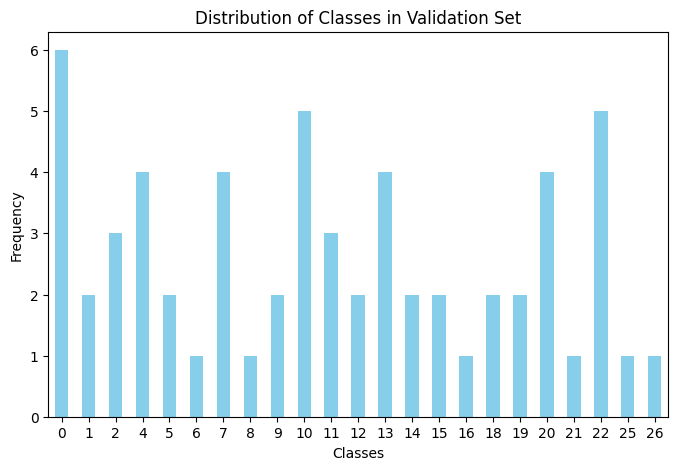

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv('/vol/ideadata/ep56inew/ImageNet_VidVRD/labels/official_split/one_class_labels_final_split_removed_classes_VAL_num.csv')

# Step 2: Count occurrences in the second column
counts = df[df.iloc[:, 2] == "VAL"].iloc[:, 1].value_counts()

# Sort the Series by index (x-axis) in ascending order
sorted_counts = counts.sort_index()

# Step 3: Plot the histogram
plt.figure(figsize=(8, 5))
sorted_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes in Validation Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()